In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
dataframe = pd.read_csv("/content/drive/My Drive/sales.csv")
print(dataframe)

                               Region  ... Total Profit
0               Australia and Oceania  ...    951410.50
1   Central America and the Caribbean  ...    248406.36
2                              Europe  ...    224598.75
3                  Sub-Saharan Africa  ...     19525.82
4                  Sub-Saharan Africa  ...    639077.50
..                                ...  ...          ...
95                 Sub-Saharan Africa  ...     65214.72
96                               Asia  ...     15103.47
97                 Sub-Saharan Africa  ...     93748.05
98                      North America  ...    144521.02
99                 Sub-Saharan Africa  ...    889472.91

[100 rows x 14 columns]


In [4]:
dataframe.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


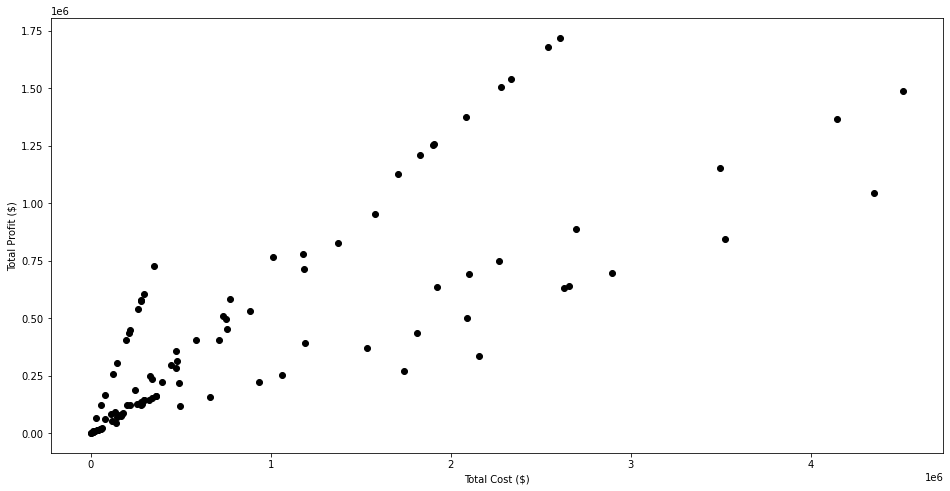

In [6]:
plt.figure(figsize=(16, 8))
plt.scatter(
    dataframe['Total Cost'],
    dataframe['Total Profit'],
    c='black'
)
plt.xlabel("Total Cost ($)")
plt.ylabel("Total Profit ($)")
plt.show()

In [7]:
X = dataframe['Total Cost'].values.reshape(-1,1)
y = dataframe['Total Profit'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 1.3855e+05 + 0.32532X


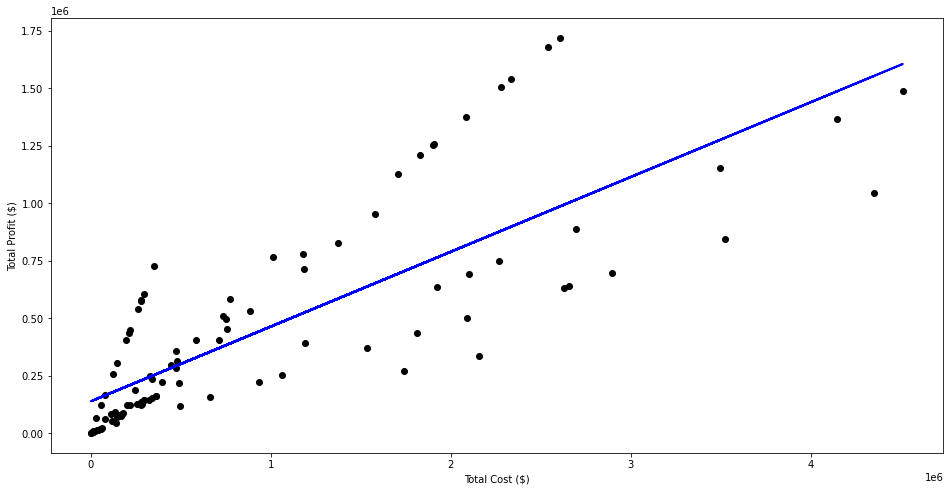

In [8]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    dataframe['Total Cost'],
    dataframe['Total Profit'],
    c='black'
)
plt.plot(
    dataframe['Total Cost'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Total Cost ($)")
plt.ylabel("Total Profit ($)")
plt.show()

In [9]:
X = dataframe['Total Cost']
y = dataframe['Total Profit']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Profit   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     179.3
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           7.33e-24
Time:                        05:35:41   Log-Likelihood:                -1388.5
No. Observations:                 100   AIC:                             2781.
Df Residuals:                      98   BIC:                             2786.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.385e+05   3.46e+04      4.001      0.0